In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("AAPL_2006-01-01_to_2018-01-01.csv", index_col = 'Date', parse_dates = ['Date'])
data.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


Text(0.5, 1.0, 'Apple Stock Prices 2006 to 2018')

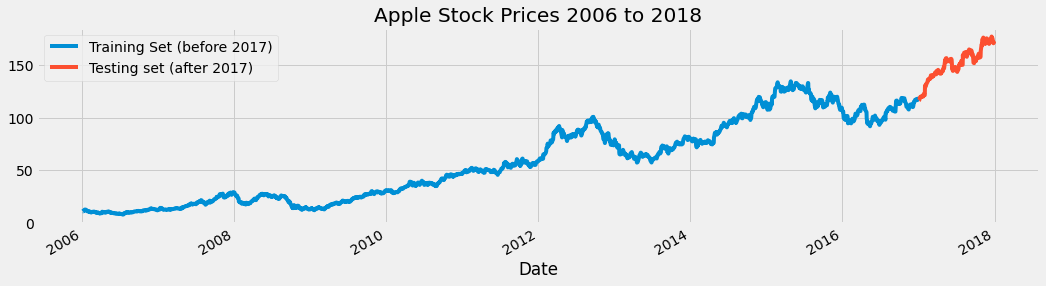

In [3]:
data['High'][:'2016'].plot(figsize = (16, 4))
data['High']['2017':].plot(figsize = (16, 4))
plt.legend(['Training Set (before 2017)', 'Testing set (after 2017)'])
plt.title("Apple Stock Prices 2006 to 2018")

In [4]:
training_data = data[:'2016'].iloc[:, 1:2].values
testing_data = data['2017':].iloc[:, 1:2].values

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [5]:
print(training_data.shape, testing_data.shape)

(2768, 1) (251, 1)


In [6]:
X_train = []
y_train = []

for i in range(251, 2768):
    X_train.append(training_set_scaled[i-251:i, 0])
    y_train.append(training_set_scaled[i,0])

In [7]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [9]:
X_train.shape

(2517, 251, 1)

In [12]:
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
79/79 [==============================] - 10s 50ms/step - loss: 0.0476
Epoch 2/50
79/79 [==============================] - 4s 49ms/step - loss: 0.0101
Epoch 3/50
79/79 [==============================] - 4s 49ms/step - loss: 0.0066
Epoch 4/50
79/79 [==============================] - 4s 49ms/step - loss: 0.0065
Epoch 5/50
79/79 [==============================] - 4s 48ms/step - loss: 0.0055
Epoch 6/50
79/79 [==============================] - 4s 48ms/step - loss: 0.0054
Epoch 7/50
79/79 [==============================] - 4s 47ms/step - loss: 0.0043
Epoch 8/50
79/79 [==============================] - 4s 47ms/step - loss: 0.0039
Epoch 9/50
79/79 [==============================] - 4s 47ms/step - loss: 0.0039
Epoch 10/50
79/79 [==============================] - 4s 47ms/step - loss: 0.0031
Epoch 11/50
79/79 [==============================] - 4s 47ms/step - loss: 0.0027
Epoch 12/50
79/79 [==============================] - 4s 48ms/step - loss: 0.0030
Epoch 13/50
79/79 [=================